# Parkinson's Disease Classification using Machine learning model (Random Forests)

<b>Importing required modules and methods from respeective libraries.</b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

<b>Reading the dataset.</b>

In [3]:
df = pd.read_csv('pd_speech_features.csv')

Based on speech signals, numerous studies on the classification of PD have been researched, applying different feature engineering and classifying methods to analyze voice records. The techniques proposed have achieved satisfactory results with high accuracies for the same dataset used in this research.

In [4]:
df.sample(10) #10 random patient values.

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
13,4,0,0.81148,0.76831,0.70809,305,304,0.006316,0.003245,0.00341,...,3.8030,3.0285,2.4145,2.1935,2.5751,2.7236,4.3104,5.0721,51.6875,1
253,84,0,0.85680,0.80533,0.46087,435,434,0.004438,0.000053,0.00106,...,3.0937,3.2624,3.5665,5.7636,26.5364,30.3080,25.0281,24.7547,68.6664,1
34,11,1,0.80339,0.64898,0.33526,292,291,0.006608,0.002308,0.00202,...,55.5652,20.6191,10.7380,4.9669,4.0681,5.1861,5.1004,4.4758,5.3617,0
251,83,0,0.80438,0.75680,0.30563,441,440,0.004376,0.000024,0.00072,...,2.1826,16.2737,4.4227,2.8865,2.3521,2.6424,23.4592,29.7303,64.1884,0
40,13,1,0.39723,0.72248,0.64741,215,214,0.008018,0.002585,0.00329,...,7.5622,7.0868,9.0723,7.6353,5.9500,7.1859,6.5469,6.2963,7.7981,1
562,187,0,0.82242,0.63409,0.36482,284,283,0.004682,0.001183,0.00218,...,8.8961,6.2693,5.0692,3.5687,2.7469,2.1213,2.2359,2.3334,2.9827,0
632,210,1,0.81476,0.65285,0.46147,213,212,0.009052,0.000041,0.00097,...,1.6843,9.7010,4.3278,4.0339,5.5730,4.6787,3.5180,4.1127,22.6308,0
262,87,1,0.53384,0.74257,0.76349,250,244,0.007239,0.001125,0.00739,...,3.2079,7.6563,6.2605,6.0716,7.0607,8.1151,8.7994,8.1001,7.7602,1
384,128,1,0.82586,0.59259,0.44395,354,353,0.005456,0.000040,0.00129,...,3.9159,6.6778,3.9993,3.2471,3.7081,4.4920,5.3888,7.2779,5.7556,1
566,188,0,0.70465,0.74166,0.47213,408,407,0.004725,0.000126,0.00201,...,39.9994,51.7277,70.5846,57.5992,41.0767,48.2282,54.9032,50.1678,93.1171,1


In [5]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [8]:
df.isnull().sum().sum() #this means there are no missing values or nan values.

0

In [9]:
feature_names = df.columns
feature_names = np.array(feature_names)
feature_names1 = np.delete(feature_names ,[0,754])

In [10]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

564 people from our data are affected with parkinson's disease and remaining 192 people are negative.

In [11]:
df.groupby('class').mean()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
class,,,,,,,,,,,,,,,,,,,,,
0,139.421875,0.359375,0.767434,0.663866,0.430807,372.244792,371.031250,0.005699,0.000290,0.001405,...,47.053772,45.754404,32.006881,21.592319,14.797452,10.726868,9.021939,9.619535,9.326543,15.074830
1,120.760638,0.569149,0.739084,0.712856,0.508888,307.539007,306.218085,0.006585,0.000414,0.002637,...,12.165554,19.593113,19.719812,17.565102,13.556976,12.726897,13.516916,16.562531,16.598373,37.066227


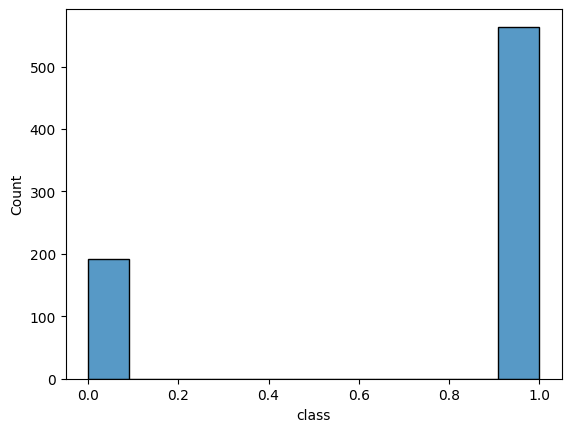

In [12]:
sns.histplot(x='class', data=df, )
plt.show()

In [13]:
df['gender'].value_counts()

1    390
0    366
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

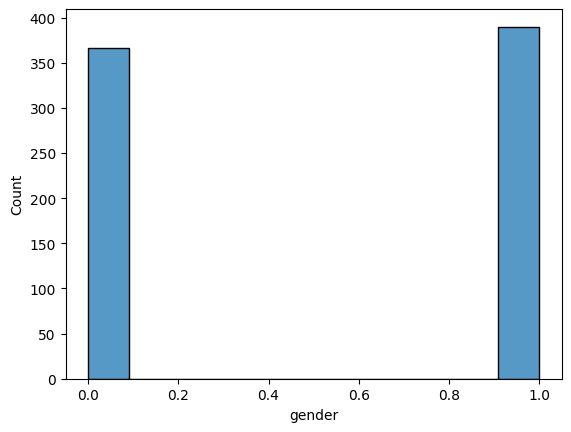

In [14]:
sns.histplot(df['gender'])

we are dividing the dataset into two sets <br>
1) dependent variables(x)
<br>2)target variable(y)

In [15]:
x = df.drop(['id','class'],axis=1) #all the inputs except id cause
y = df['class']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


splitting the dependent and target variables into training and testing data

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(567, 753)
(189, 753)
(567,)
(189,)


In [17]:
x_train.sample(10)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
200,0,0.84381,0.80090,0.43934,338,337,0.005710,0.000076,0.00198,0.000011,...,18.9532,139.0267,115.4005,94.0509,62.4218,44.3481,34.0341,19.1256,15.8604,9.1055
109,1,0.83688,0.59464,0.57059,313,312,0.006168,0.000072,0.00171,0.000011,...,2.2828,65.0107,16.7081,4.5445,2.6795,2.7662,2.7253,3.2968,3.3047,3.8903
559,1,0.83125,0.81924,0.42378,277,276,0.006969,0.000110,0.00128,0.000009,...,1.6573,1.9998,17.9180,12.5463,7.0266,3.1538,3.1676,36.0423,46.4668,117.4627
7,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,0.000017,...,1.5800,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448
444,0,0.22366,0.68930,0.49566,304,302,0.006339,0.001706,0.00247,0.000016,...,1.5287,1.5522,24.6754,4.4021,2.9579,2.7540,2.3096,2.9548,2.8065,2.7863
446,0,0.78118,0.69000,0.48311,340,339,0.005674,0.000083,0.00141,0.000008,...,1.6546,1.5588,71.2566,63.1578,30.4447,15.1617,17.0931,17.6872,10.8535,9.5221
315,1,0.69603,0.68074,0.55504,338,337,0.005714,0.000139,0.00181,0.000010,...,4.2593,72.3672,90.1137,40.6813,8.7739,5.0550,5.1963,3.9717,3.4539,3.2549
227,0,0.80977,0.79954,0.39002,310,308,0.006227,0.001617,0.00241,0.000015,...,2.1174,4.8785,4.0127,2.7553,3.1202,3.9626,5.2981,7.3550,7.9845,3.9543
208,0,0.82631,0.59853,0.50208,479,478,0.004029,0.000038,0.00086,0.000003,...,102.2019,83.3468,61.7200,32.5427,13.2030,5.4628,2.2858,1.8806,1.9559,3.6045
719,1,0.69954,0.72157,0.74223,203,202,0.009508,0.000151,0.00454,0.000043,...,1.5909,1.5098,1.5915,28.7679,46.6746,54.1454,48.9675,43.7105,36.3226,79.6239


The SelectKBest method is a feature selection technique used in machine learning to select the most important features from a dataset. It works by selecting the k most relevant features based on a scoring function that measures the strength of the relationship between each feature and the target variable.<br><br><br>The SelectKBest method is commonly used in preprocessing because it helps reduce the dimensionality of the dataset, which can improve the accuracy and speed of the model. The method works by ranking the features based on their scores and selecting the top k features with the highest scores. The scoring function used can vary, but some commonly used methods include chi-squared, mutual information, and f-regression.<br><br><br>Mutual Information: The mutual information scoring function measures the amount of information that one variable (i.e., the feature) contains about another variable (i.e., the target variable). The higher the mutual information score, the more information the feature contains about the target variable.<br><br>Once the scoring function is applied to each feature, the SelectKBest method ranks the features based on their scores and selects the top k features with the highest scores. <br><br> mutual information can be used to measure the amount of information that a feature provides about the target variable. Features with higher mutual information scores are considered more informative and may be selected for inclusion in a machine learning model.<br><br>I(X ; Y) = H(X) – H(X | Y)
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Mutual information is a measure of dependence or “mutual dependence” between two random variables. As such, the measure is symmetrical, meaning that I(X ; Y) = I(Y ; X).

In [18]:
mutual_info = mutual_info_classif(x_train,y_train)

In [19]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = feature_names1
mutual = mutual_info[:20]
mutual

gender                     0.005778
PPE                        0.029499
DFA                        0.040211
RPDE                       0.009938
numPulses                  0.064079
numPeriodsPulses           0.054111
meanPeriodPulses           0.059245
stdDevPeriodPulses         0.052253
locPctJitter               0.067488
locAbsJitter               0.080224
rapJitter                  0.040294
ppq5Jitter                 0.069317
ddpJitter                  0.051340
locShimmer                 0.041977
locDbShimmer               0.055098
apq3Shimmer                0.000000
apq5Shimmer                0.017782
apq11Shimmer               0.014182
ddaShimmer                 0.000000
meanAutoCorrHarmonicity    0.036270
dtype: float64

In [20]:
feature_names2 = feature_names1[:20]
feature_names2

array(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
       'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer',
       'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity'],
      dtype=object)

In [21]:
selector = SelectKBest(mutual_info_classif, k=100)
x_train = selector.fit_transform(x_train, y_train)
x_test = selector.transform(x_test)

In [22]:
selected_indices = selector.get_support(indices=True)
selected_features = feature_names[selected_indices]
selected_features

array(['RPDE', 'numPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter', 'ppq5Jitter', 'meanHarmToNoiseHarmonicity',
       'minIntensity', 'maxIntensity', 'mean_MFCC_1st_coef',
       'mean_delta_log_energy', 'std_MFCC_12th_coef', 'std_5th_delta',
       'std_12th_delta', 'std_2nd_delta_delta', 'std_3rd_delta_delta',
       'std_5th_delta_delta', 'std_6th_delta_delta',
       'std_7th_delta_delta', 'std_8th_delta_delta',
       'app_entropy_shannon_3_coef', 'app_entropy_shannon_4_coef',
       'app_TKEO_std_4_coef', 'app_LT_entropy_shannon_4_coef',
       'app_LT_entropy_shannon_5_coef', 'app_LT_entropy_shannon_6_coef',
       'app_LT_entropy_shannon_7_coef', 'app_LT_entropy_shannon_8_coef',
       'app_LT_entropy_log_4_coef', 'app_LT_entropy_log_5_coef',
       'app_LT_entropy_log_6_coef', 'app_LT_TKEO_std_4_coef',
       'tqwt_energy_dec_12', 'tqwt_energy_dec_24', 'tqwt_energy_dec_25',
       'tqwt_energy_dec_26', 'tqwt_entropy_shannon_dec_6',
       'tqwt_entropy_sh

In [23]:
len(selected_features)

100

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(type(x_train))
print(type(x_test))
print(type(y_train))

(567, 100)
(189, 100)
(567,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [25]:
x_train

array([[ 3.650000e+02,  3.640000e+02,  1.440000e-03, ...,  4.491400e-03,
         8.858500e+00,  5.077020e+01],
       [ 2.850000e+02,  2.830000e+02,  1.290000e-03, ..., -5.989000e-04,
         1.294070e+01,  4.246300e+00],
       [ 4.290000e+02,  4.280000e+02,  9.300000e-04, ..., -1.205800e+00,
         9.253600e+00,  4.106000e+00],
       ...,
       [ 2.980000e+02,  2.970000e+02,  8.900000e-04, ..., -9.530000e-05,
         5.326500e+00,  5.590200e+00],
       [ 2.770000e+02,  2.760000e+02,  1.280000e-03, ...,  3.358400e-04,
         1.697540e+01,  1.174627e+02],
       [ 2.760000e+02,  2.750000e+02,  1.640000e-03, ..., -4.550000e-05,
         9.863100e+00,  9.742190e+01]])

In [26]:
x_train = pd.DataFrame(x_train,columns = selected_features)
x_train.head()

,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,ppq5Jitter,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,mean_MFCC_1st_coef,...,tqwt_maxValue_dec_16,tqwt_skewnessValue_dec_15,tqwt_skewnessValue_dec_16,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_35
0,365.0,364.0,0.00144,0.000008,0.00031,0.00092,63.808043,67.456526,65.859638,3.11680,...,0.18390,0.001359,-0.004687,-0.006423,0.019269,0.003028,0.000246,0.004491,8.8585,50.7702
1,285.0,283.0,0.00129,0.000009,0.00026,0.00077,76.717847,78.856254,77.923276,0.13828,...,0.82228,0.005398,0.000187,0.001211,0.020818,0.010503,-0.000428,-0.000599,12.9407,4.2463
2,429.0,428.0,0.00093,0.000004,0.00009,0.00027,78.326098,81.102545,79.845701,-1.66580,...,0.99198,0.000214,0.000117,-0.000190,-0.001479,-0.000009,0.008822,-1.205800,9.2536,4.1060
3,380.0,379.0,0.00302,0.000015,0.00073,0.00219,79.032401,80.651938,79.726410,2.85710,...,0.89844,0.029701,-0.002846,0.001127,-0.001181,-0.014229,-0.000143,0.006731,6.8101,2.7635
4,400.0,399.0,0.00225,0.000011,0.00016,0.00049,78.304901,80.479500,79.354193,1.64750,...,0.91468,-0.003120,-0.008393,0.000270,0.005267,0.000007,0.008268,0.022123,12.9599,14.0905


In [27]:
x_test = pd.DataFrame(x_test,columns = selected_features)
x_test.head()

,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,ppq5Jitter,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,mean_MFCC_1st_coef,...,tqwt_maxValue_dec_16,tqwt_skewnessValue_dec_15,tqwt_skewnessValue_dec_16,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_35
0,356.0,355.0,0.00129,0.000007,0.00016,0.00049,76.046117,80.403721,78.417348,-0.66072,...,0.87034,9.660000e-05,1.583000e-03,-3.266300e-04,4.516000e-03,4.977500e-03,-2.132500e-04,1.516900e-02,10.9205,18.9718
1,381.0,380.0,0.00112,0.000006,0.00019,0.00058,75.572054,78.438432,77.253862,-2.03130,...,0.58321,3.790000e-05,4.849000e-03,1.065000e-04,-4.742100e-03,-1.719500e-03,-7.720000e-05,1.907600e-03,6.0842,2.9275
2,276.0,275.0,0.00379,0.000027,0.00057,0.00170,77.560289,80.246423,78.901853,1.21490,...,0.68992,1.090000e-17,-2.300000e-17,5.930000e-18,4.030000e-18,1.730000e-17,-2.000000e-18,-6.100000e-18,702.3142,2.6109
3,333.0,332.0,0.00110,0.000006,0.00022,0.00066,77.217507,79.149413,78.261211,-0.17811,...,0.85947,5.246500e-04,-6.877700e-04,-1.270000e-05,6.125200e-04,1.461600e-02,-2.777300e-04,-1.713100e-03,8.2246,4.4909
4,351.0,350.0,0.00258,0.000014,0.00043,0.00130,74.680778,78.791567,77.351024,2.72270,...,0.42200,1.507100e-03,2.949300e-04,-1.205000e-04,3.315900e-03,4.401000e-04,-8.260000e-05,1.079800e-02,4.9112,3.9321


In [28]:
x_test.shape

(189, 100)

In [29]:
x_train.corr()

,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,ppq5Jitter,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,mean_MFCC_1st_coef,...,tqwt_maxValue_dec_16,tqwt_skewnessValue_dec_15,tqwt_skewnessValue_dec_16,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_35
RPDE,1.000000,0.999901,-0.434070,-0.519710,-0.443321,-0.443293,0.130876,0.109733,0.120616,-0.410236,...,0.139934,0.045954,0.026698,0.015303,-0.098695,0.217334,0.050020,0.106635,-0.038286,-0.031183
numPulses,0.999901,1.000000,-0.441430,-0.526180,-0.451115,-0.451086,0.133388,0.111059,0.122372,-0.410147,...,0.141013,0.047195,0.026294,0.016321,-0.098849,0.216950,0.049879,0.106501,-0.038073,-0.031135
stdDevPeriodPulses,-0.434070,-0.441430,1.000000,0.968938,0.963490,0.963515,-0.200348,-0.104239,-0.143679,0.250342,...,-0.135206,-0.028991,-0.032699,-0.050549,0.011961,-0.030882,-0.006721,-0.034157,-0.024411,0.012551
locPctJitter,-0.519710,-0.526180,0.968938,1.000000,0.955077,0.955113,-0.168833,-0.094139,-0.125884,0.257125,...,-0.126221,-0.024118,-0.023288,-0.036767,0.006031,-0.038635,-0.004848,-0.035423,-0.013634,0.005117
locAbsJitter,-0.443321,-0.451115,0.963490,0.955077,1.000000,0.999997,-0.205829,-0.133962,-0.166588,0.253535,...,-0.163197,-0.028918,-0.028144,-0.044722,0.015729,-0.035235,-0.004910,-0.030931,-0.003559,0.024821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_skewnessValue_dec_22,0.217334,0.216950,-0.030882,-0.038635,-0.035235,-0.035251,0.051225,0.050979,0.050759,-0.103577,...,0.021547,0.043821,0.009652,0.036548,-0.043180,1.000000,0.060352,0.034699,-0.006829,-0.050248
tqwt_skewnessValue_dec_24,0.050020,0.049879,-0.006721,-0.004848,-0.004910,-0.004904,0.011488,0.010343,0.011034,-0.018071,...,0.010630,0.014007,0.003937,0.007829,-0.024852,0.060352,1.000000,0.089766,-0.000026,0.010849
tqwt_skewnessValue_dec_25,0.106635,0.106501,-0.034157,-0.035423,-0.030931,-0.030709,0.032205,0.038454,0.033429,-0.067743,...,-0.008639,0.006606,0.005575,0.008929,-0.018342,0.034699,0.089766,1.000000,-0.014134,-0.054217
tqwt_kurtosisValue_dec_4,-0.038286,-0.038073,-0.024411,-0.013634,-0.003559,-0.003435,-0.479744,-0.551988,-0.551667,0.182225,...,-0.264002,-0.005532,0.011361,-0.008536,-0.020567,-0.006829,-0.000026,-0.014134,1.000000,0.183131


In [30]:
#applying Random Forest model

In [31]:
m2 = RandomForestClassifier(n_estimators = 200,criterion='entropy',max_depth=20,min_samples_split=12)
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=12,
                       n_estimators=200)

In [32]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.9982363315696648
Testing Score 0.8624338624338624


here the difference between training accuracy and testing accuracy is more. this means our data is overfitted.

In [33]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 1]


In [34]:
ypred = np.array(ypred_m2)
ytest = np.array(y_test)

In [35]:
data = {'Original': ytest,
        'Predicted': ypred}

In [36]:
comp = pd.DataFrame(data)
comp.sample(10)

,Original,Predicted
137,1,1
81,1,1
138,1,1
140,1,1
174,1,1
59,0,1
41,1,1
170,1,1
95,1,1
15,1,1


In [37]:
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2))

[[ 27  18]
 [  8 136]]
              precision    recall  f1-score   support

           0       0.77      0.60      0.68        45
           1       0.88      0.94      0.91       144

    accuracy                           0.86       189
   macro avg       0.83      0.77      0.79       189
weighted avg       0.86      0.86      0.86       189



In [38]:
# fn = feature names
fn = feature_names

# class_name or category names
cn = ['0','1']
print(cn)

['0', '1']


In [39]:
plt.figure(figsize=(100,100))
tree.plot_tree(m2.estimators_[0],feature_names=fn,class_names=cn,filled=True)
plt.show()

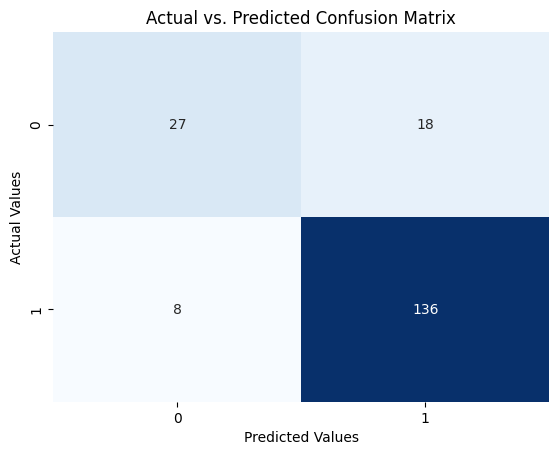

In [40]:
#conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(cm_m2, annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Actual vs predicted plot')

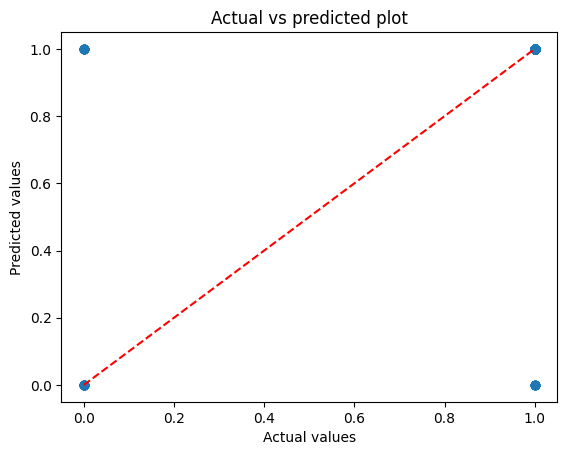

In [41]:
plt.scatter(y_test, ypred_m2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted plot")

Text(0.5, 1.0, 'Feature importances')

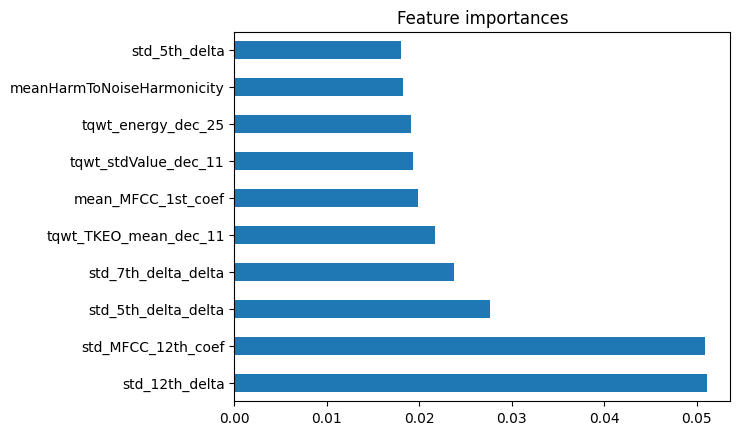

In [42]:
feat_importances = pd.Series(m2.feature_importances_, index=selected_features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importances")

In [43]:
from sklearn.metrics import mean_squared_error, roc_curve, precision_recall_curve, auc
rmse = np.sqrt(mean_squared_error(y_test, ypred_m2))
print("RMSE:", rmse)

RMSE: 0.3708990935094579


In [46]:
from sklearn.inspection import plot_partial_dependence

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (c:\Program Files\Python311\Lib\site-packages\sklearn\inspection\__init__.py)

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

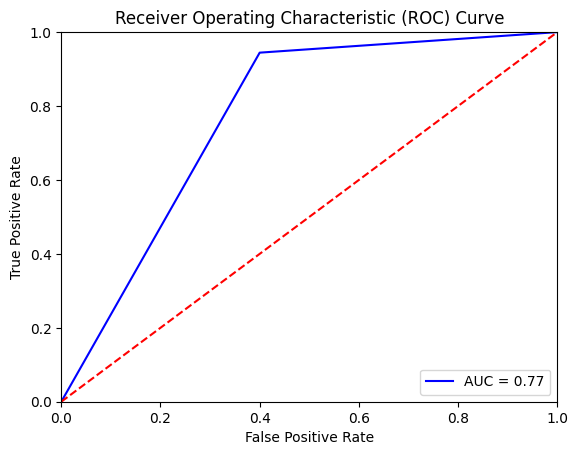

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_m2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.plot(fnr, tnr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

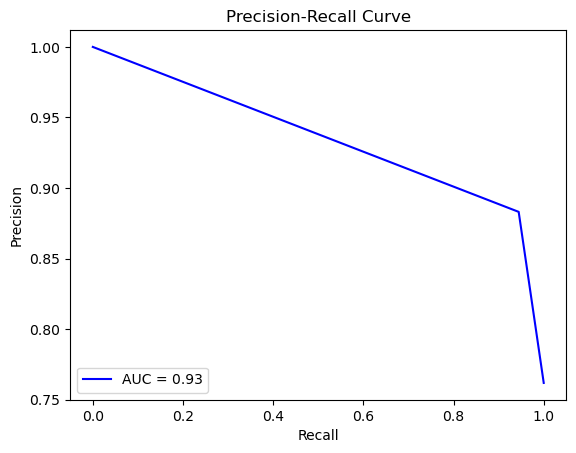

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypred_m2)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower left')

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
def parkinson(input_data):
    # changing input data to a numpy array
    input_data_as_array = np.asarray(input_data)

    # reshape the numpy array
    input_data_reshaped = input_data_as_array.reshape(1,-1)

    predict = m2.predict(input_data_reshaped)
    print(predict)

    if (predict[0] == 0):
      print("The Person does not have Parkinsons Disease")

    else:
      print("The Person has Parkinsons")

In [ ]:
input_data_1 = (0.00218,18.995,69.9974958,76.08804597,8.4781,-0.001013,0.17762,0.030284,0.023057,0.06641,0.021565,0.015351,0.014642,0.019681,0.012829,-54991273,-79779216.69,322.8542,67151.7571,-57264.6625,-98433.1856,-184901.7535,-381059.351,-776445.2329,-1676725.978,153.8978,132.2489,124.1971,101.0889,0.00023899,0.057908,0.01007,0.057575,0.59587,2.1832,4.8635,2.818,18.8625,89.7525,189.5,0.023151,0.015562,-281439.269,-229943.2967,-201985.0408,-52209.7866,-3726.2679,1.67E-07,6.78E-06,2.44E-05,3.58E-05,5.03E-05,2.33E-05,0.0069193,8.58E-07,2.53E-06,1.50E-05,5.87E-05,7.36E-05,5.90E-05,0.00018979,0.02762,-1.27E-07,-3.10E-05,1.03E-05,0,-0.00038921,6.15E-17,0,0.0004446,-0.00016867,0.00039625,0.0010075,0.0022682,0.0046972,0.0051989,0.0043241,0.013373,0.036869,0.063087,0.0027106,-0.026273,-0.02416,-0.026321,-0.024286,-0.29603,0.025222,0.022796,0.048924,0.20486,0.29603,0.0074332,1.51E-17,2.21E-17,-4.47E-17,-4.29E-19,-9.66E-18,0.030756,51.9577,3.0004)

parkinson(input_data_1)

[1]
The Person has Parkinsons


C:\Users\Bobby\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
input_data_2 = (0.00143,18.723,67.44275074,73.72491725,6.3131,0.0055168,0.2923,0.028751,0.030072,0.016072,0.021327,0.014622,0.013687,0.014232,0.015491,-165325200.3,-239355853.7,349.3665,185527.0574,-72390.4008,-124060.2075,-232480.5396,-478102.1104,-972410.3369,-2096387.081,159.1237,136.2766,127.6267,123.5262,0.0010987,0.018368,0.003217,0.017395,4.3392,11.4121,9.7016,17.0094,105.6802,313.6427,503.3029,0.051826,0.033847,-277071.0109,-237033.0165,-169952.469,-38134.2913,-3590.6391,1.66E-06,5.07E-05,9.44E-05,9.04E-05,8.40E-05,0.00014602,0.019338,3.64E-06,2.17E-05,9.93E-05,0.00020212,0.00022585,0.00040364,0.0016702,0.07317,-1.71E-05,-7.54E-06,0.0018769,0,-0.00052791,-4.83E-17,0,0.003019,-5.09E-06,0.0012369,0.0029722,0.0056616,0.0071432,0.0073137,0.01201,0.036967,0.08029,0.10472,0.0063884,-0.046917,-0.046517,-0.042828,-0.060137,-0.41558,0.039478,0.042851,0.12806,0.30357,0.41558,-0.014798,-5.89E-17,1.51E-18,6.96E-17,-1.86E-18,4.83E-18,0.052857,7.5286,16.8211)

parkinson(input_data_2)

[1]
The Person has Parkinsons


C:\Users\Bobby\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
input_data_3=(0.00052,22.958,70.22431133,75.2048644,5.4186,-0.0019815,0.22318,0.04328,0.026754,0.022424,0.026179,0.020395,0.017485,0.015125,0.01695,-249169306.1,-360651631.8,359.2967,270848.7125,-78561.7009,-134513.7952,-251862.7568,-517553.089,-1052023.137,-2266727.154,160.9535,137.6885,128.8286,132.4621,0.0036181,0.11037,0.017917,8.73E-05,6.2309,6.0288,2.2686,17.6297,46.9162,107.9097,468.5039,0.02525,0.0089434,-295349.8697,-233599.9194,-158947.3521,-38118.871,-3774.0485,5.70E-05,1.69E-05,8.49E-05,1.20E-05,2.09E-05,0.00016192,0.0097612,0.00012124,4.26E-05,2.13E-05,1.82E-05,3.46E-05,0.00015203,0.00060881,0.027446,-1.05E-05,1.14E-05,0.0006501,0.00041501,5.70E-05,-0.00058157,-0.0010901,-9.75E-05,0.0002048,0.0054128,0.0036621,0.0038472,0.0030394,0.0045931,0.011581,0.022573,0.041424,0.084427,0.0075155,-0.027542,-0.014041,-0.017253,-0.037734,-0.30601,0.013217,0.021175,0.070159,0.21291,0.31208,8.96E-05,4.13E-05,0.0024833,-0.15516,-2.99E-05,-0.0068964,0.057397,8.4184,4.6597)

In [ ]:
parkinson(input_data_3)

[1]
The Person has Parkinsons


C:\Users\Bobby\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
